In [62]:
from lazypredict.Supervised import LazyRegressor
import pandas as pd
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import (LabelEncoder, StandardScaler, 
                                   PowerTransformer, QuantileTransformer, 
                                   OrdinalEncoder, OneHotEncoder)
from sklearn.metrics import *
from sklearn.model_selection import (cross_val_score, cross_validate, 
                                     GridSearchCV, KFold, 
                                     RandomizedSearchCV, train_test_split,
                                     learning_curve, LearningCurveDisplay)
from sklearn.utils.estimator_checks import check_estimator
import matplotlib.pyplot as plt
import pickle
import shap
import seaborn as sns
from scipy.stats import randint, uniform


# Pruebas con los datos sin transformar

Como nota, me apunto también una idea, que es transformar los datos con el quantile transformer, que manda los datos a una normal, y los transormadores son la hostia porque se pueden deshacer y au

In [2]:
data = pd.read_csv("data_model_trim.csv")

y = data.Ncasos_lead
X = data.drop(["Ncasos_lead", "Mun"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state =123)

In [3]:
data

Mun  Ncasos_lead  Ncasos_lagroll_15  Ncasos_lagroll_30     nHab  \
0     BARCELONA         2438            1096.00             737.75  1664182   
1     BARCELONA         2213            1868.50            1219.25  1664182   
2     BARCELONA         1874            2388.00            1742.00  1664182   
3     BARCELONA         1964            2325.50            2097.00  1664182   
4     BARCELONA         2077            2043.50            2215.75  1664182   
...         ...          ...                ...                ...      ...   
5492  VILA-SECA            3               6.00               9.25    22522   
5493  VILA-SECA            2               6.00               6.00    22522   
5494  VILA-SECA           40              72.00              52.00    22681   
5495  VILA-SECA           21              54.50              63.25    22681   
5496  VILA-SECA            3              32.50              55.00    22681   

        caudal  lluvia  sars_loess  sars_loess_15  sars_loess_30  Month  
0    317575.00    0.30    35205.83       49926.86       48563.41      7  
1    324759.00    0.00    64647.89       77625.60       75671.23      7  
2    312062.00    0.00    90603.30      101415.60       99300.39      7  
3    331372.00    9.60   112227.90      120975.19      121038.07      8  
4    281022.00    0.00   129722.48      140660.54      139518.54      8  
...        ...     ...         ...            ...            ...    ...  
5492  33019.00    0.00    38381.00       20415.50      303164.00      9  
5493  32518.00    0.00     2450.00      586929.50      436924.50      9  
5494  43255.70    0.00  1171409.00      853433.50      524086.25      6  
5495  38313.00    0.00   387028.00      352211.00      480995.25      7  
5496  39319.00    0.00   317394.00      500747.50      398151.50      7  

[5497 rows x 11 columns]

In [11]:
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)

models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [17:03<00:00, 24.36s/it] 


Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.84       0.84  251.53   
XGBRegressor                                 0.74       0.74  320.00   
LGBMRegressor                                0.67       0.67  358.63   
HistGradientBoostingRegressor                0.65       0.65  370.47   
KNeighborsRegressor                          0.61       0.62  389.25   
RandomForestRegressor                        0.55       0.55  419.13   
MLPRegressor                                 0.55       0.55  421.14   
TransformedTargetRegressor                   0.54       0.54  424.13   
LinearRegression                             0.54       0.54  424.13   
LassoLarsIC                                  0.54       0.54  424.13   
Lars                                         0.54       0.54  424.13   
Ridge                                        0.54       0.54  424.16   
RidgeCV                                      0.54       0.54  424.55   
BayesianRidge                                0.54       0.54  424.78   
Lasso                                        0.54       0.54  424.84   
LassoCV                                      0.54       0.54  425.55   
LarsCV                                       0.54       0.54  425.69   
LassoLarsCV                                  0.54       0.54  425.69   
OrthogonalMatchingPursuitCV                  0.53       0.54  426.53   
LassoLars                                    0.53       0.54  426.59   
ElasticNet                                   0.53       0.53  429.78   
SGDRegressor                                 0.53       0.53  430.62   
ElasticNetCV                                 0.52       0.52  433.05   
GradientBoostingRegressor                    0.52       0.52  435.07   
TweedieRegressor                             0.51       0.51  438.63   
RANSACRegressor                              0.50       0.51  440.89   
HuberRegressor                               0.50       0.50  442.22   
PassiveAggressiveRegressor                   0.50       0.50  443.12   
ExtraTreeRegressor                           0.50       0.50  443.86   
PoissonRegressor                             0.48       0.48  450.43   
LinearSVR                                    0.45       0.45  464.58   
KernelRidge                                  0.40       0.40  484.34   
OrthogonalMatchingPursuit                    0.38       0.38  492.94   
BaggingRegressor                             0.37       0.37  498.33   
DecisionTreeRegressor                        0.35       0.35  504.85   
NuSVR                                        0.00       0.01  624.69   
SVR                                         -0.00       0.00  626.32   
DummyRegressor                              -0.01      -0.00  627.76   
QuantileRegressor                           -0.07      -0.07  647.68   
AdaBoostRegressor                           -0.40      -0.39  740.65   
GammaRegressor                             -15.23     -15.13 2520.11   
GaussianProcessRegressor                   -44.15     -43.85 4202.71   

                               Time Taken  
Model                                      
ExtraTreesRegressor                  0.54  
XGBRegressor                         0.26  
LGBMRegressor                        0.08  
HistGradientBoostingRegressor        0.21  
KNeighborsRegressor                  0.03  
RandomForestRegressor                1.36  
MLPRegressor                         1.55  
TransformedTargetRegressor           0.01  
LinearRegression                     0.01  
LassoLarsIC                          0.02  
Lars                                 0.01  
Ridge                                0.01  
RidgeCV                              0.01  
BayesianRidge                        0.01  
Lasso                                0.03  
LassoCV                              0.11  
LarsCV                               0.03  
LassoLarsCV               

Por lo que parece, del tema modelos el mejor es el lightgb, o light gradient boosting, el hermano menor del xgb (lo intenté usar en R y overfiteó en seguida a los datos de entrenamiento, siento que el puto xgb no consigue generalizar una mierda si no tiene millones de datos). Me da a mi que voy a probar primero ese, aunque luego retocaré los datos o algo y también veré qué modelos son mejores en estos (demasiada faena sinceramente).

In [8]:
data.describe()

Ncasos_lead  Ncasos_lagroll_15  Ncasos_lagroll_30       nHab    caudal  \
count      5497.00            5497.00            5497.00    5497.00   5497.00   
mean        223.66             222.75             223.21   72769.75  49279.71   
std        1047.77             988.35             946.88  210370.15  88085.99   
min           1.00               1.00               1.00    2256.00     17.38   
25%          22.00              22.50              23.75   15312.00  11912.00   
50%          52.00              53.50              54.25   26965.00  21408.00   
75%         136.00             140.50             142.25   57217.00  45468.00   
max       45832.00           44614.00           33371.00 1664182.00 591982.00   

       lluvia  sars_loess  sars_loess_15  sars_loess_30  
count 5497.00     5497.00        5497.00        5497.00  
mean     2.58   462346.00      463835.57      461885.27  
std     54.31   937950.80      922605.57      871948.75  
min      0.00        0.00          -0.00          -0.00  
25%      0.00    31979.55       35140.97       39353.23  
50%      0.00   108773.07      114382.44      118270.28  
75%      0.00   490138.82      511339.07      514149.67  
max   1669.00 16213607.61    16016724.23    14343365.24

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

Mun                  0
Ncasos_lead          0
Ncasos_lagroll_15    0
Ncasos_lagroll_30    0
nHab                 0
caudal               0
lluvia               0
sars_loess           0
sars_loess_15        0
sars_loess_30        0
Month                0
dtype: int64

In [10]:
data.select_dtypes(include='number').columns

Index(['Ncasos_lead', 'Ncasos_lagroll_15', 'Ncasos_lagroll_30', 'nHab',
       'caudal', 'lluvia', 'sars_loess', 'sars_loess_15', 'sars_loess_30'],
      dtype='object')

In [26]:
list(data.select_dtypes(include='number').columns) # Esto supongo que lo hice por si quería transformar algo

['Ncasos_lead',
 'Ncasos_lagroll_15',
 'Ncasos_lagroll_30',
 'nHab',
 'caudal',
 'lluvia',
 'sars_loess',
 'sars_loess_15',
 'sars_loess_30']

In [9]:
data

Mun  Ncasos_lead  Ncasos_lagroll_15  Ncasos_lagroll_30     nHab  \
0     BARCELONA         2438            1096.00             737.75  1664182   
1     BARCELONA         2213            1868.50            1219.25  1664182   
2     BARCELONA         1874            2388.00            1742.00  1664182   
3     BARCELONA         1964            2325.50            2097.00  1664182   
4     BARCELONA         2077            2043.50            2215.75  1664182   
...         ...          ...                ...                ...      ...   
5492  VILA-SECA            3               6.00               9.25    22522   
5493  VILA-SECA            2               6.00               6.00    22522   
5494  VILA-SECA           40              72.00              52.00    22681   
5495  VILA-SECA           21              54.50              63.25    22681   
5496  VILA-SECA            3              32.50              55.00    22681   

        caudal  lluvia  sars_loess  sars_loess_15  sars_loess_30      Month  
0    317575.00    0.30    35205.83       49926.86       48563.41       July  
1    324759.00    0.00    64647.89       77625.60       75671.23       July  
2    312062.00    0.00    90603.30      101415.60       99300.39       July  
3    331372.00    9.60   112227.90      120975.19      121038.07     August  
4    281022.00    0.00   129722.48      140660.54      139518.54     August  
...        ...     ...         ...            ...            ...        ...  
5492  33019.00    0.00    38381.00       20415.50      303164.00  September  
5493  32518.00    0.00     2450.00      586929.50      436924.50  September  
5494  43255.70    0.00  1171409.00      853433.50      524086.25       June  
5495  38313.00    0.00   387028.00      352211.00      480995.25       July  
5496  39319.00    0.00   317394.00      500747.50      398151.50       July  

[5497 rows x 11 columns]

In [4]:
# quiero los meses como categóricos
nmeses = [1,2,3,4,5,6,7,8,9,10,11,12]
meses = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
m_dict = {x:y for x,y in zip(nmeses,meses)}
data.replace({"Month":m_dict}, inplace = True)
data_model = data.copy()

In [5]:
month_encoder = OrdinalEncoder(categories=[meses])
months = data[['Month']]
months_encoded = month_encoder.fit_transform(months)

In [6]:
data_model['Month'] = months_encoded
data_model.drop(['Mun'], axis = 1, inplace = True)

In [7]:
data_model

Ncasos_lead  Ncasos_lagroll_15  Ncasos_lagroll_30     nHab    caudal  \
0            2438            1096.00             737.75  1664182 317575.00   
1            2213            1868.50            1219.25  1664182 324759.00   
2            1874            2388.00            1742.00  1664182 312062.00   
3            1964            2325.50            2097.00  1664182 331372.00   
4            2077            2043.50            2215.75  1664182 281022.00   
...           ...                ...                ...      ...       ...   
5492            3               6.00               9.25    22522  33019.00   
5493            2               6.00               6.00    22522  32518.00   
5494           40              72.00              52.00    22681  43255.70   
5495           21              54.50              63.25    22681  38313.00   
5496            3              32.50              55.00    22681  39319.00   

      lluvia  sars_loess  sars_loess_15  sars_loess_30  Month  
0       0.30    35205.83       49926.86       48563.41   6.00  
1       0.00    64647.89       77625.60       75671.23   6.00  
2       0.00    90603.30      101415.60       99300.39   6.00  
3       9.60   112227.90      120975.19      121038.07   7.00  
4       0.00   129722.48      140660.54      139518.54   7.00  
...      ...         ...            ...            ...    ...  
5492    0.00    38381.00       20415.50      303164.00   8.00  
5493    0.00     2450.00      586929.50      436924.50   8.00  
5494    0.00  1171409.00      853433.50      524086.25   5.00  
5495    0.00   387028.00      352211.00      480995.25   6.00  
5496    0.00   317394.00      500747.50      398151.50   6.00  

[5497 rows x 10 columns]

Quiero hacer primero la prueba con las variables sin transformar, tal y como me ha dado antes el lazy predict. Debería llegar a hacer la prueba con los datos transformados también y luego hacer el fine tuning.

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
X = data_model.drop('Ncasos_lead', axis = 1)
y = data_model[['Ncasos_lead']]
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(ETR,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_absolute_error'])



In [12]:
pd.DataFrame(scores)

fit_time  score_time                                          estimator  \
0      0.60        0.02  (ExtraTreeRegressor(random_state=934484084), E...   
1      0.59        0.02  (ExtraTreeRegressor(random_state=530398082), E...   
2      0.59        0.02  (ExtraTreeRegressor(random_state=1936734007), ...   
3      0.59        0.02  (ExtraTreeRegressor(random_state=1121417446), ...   
4      0.58        0.02  (ExtraTreeRegressor(random_state=718470113), E...   

   test_r2  test_neg_mean_absolute_error  
0     0.74                        -92.49  
1     0.87                        -77.19  
2    -2.91                       -141.35  
3     0.76                        -88.99  
4     0.40                       -140.24

Existen fraccionados del modelo que no funcionan en absoluto. Por algún motivo la $R^2$ es bastante malucha. Vamos a probar el LGBM. 
Aunque antes voy a probar también el random forest por si.

In [51]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
# X = data_model.drop('Ncasos_lead', axis = 1)
# y = data_model[['Ncasos_lead']]
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(RFR,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_absolute_error'])
pd.DataFrame(scores)

fit_time  score_time                                          estimator  \
0      1.90        0.02  (DecisionTreeRegressor(max_features=1.0, rando...   
1      1.91        0.02  (DecisionTreeRegressor(max_features=1.0, rando...   
2      1.90        0.02  (DecisionTreeRegressor(max_features=1.0, rando...   
3      1.86        0.02  (DecisionTreeRegressor(max_features=1.0, rando...   
4      1.83        0.02  (DecisionTreeRegressor(max_features=1.0, rando...   

   test_r2  test_neg_mean_absolute_error  
0     0.61                       -111.25  
1     0.71                        -89.67  
2    -0.90                       -127.23  
3     0.46                       -112.98  
4     0.33                       -151.50

Le ocurre exactamente igual y funciona algo peor.

In [13]:
from lightgbm import LGBMRegressor 
LGBM = LGBMRegressor()
X = data_model.drop('Ncasos_lead', axis = 1)
y = data_model[['Ncasos_lead']]
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(LGBM,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_absolute_error'])
pd.DataFrame(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 222.135547
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 227.116443
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 9
[LightGBM] [Info] Start train

fit_time  score_time        estimator  test_r2  \
0      0.06        0.00  LGBMRegressor()     0.66   
1      0.03        0.00  LGBMRegressor()     0.66   
2      0.03        0.00  LGBMRegressor()     0.51   
3      0.03        0.00  LGBMRegressor()     0.42   
4      0.02        0.00  LGBMRegressor()     0.31   

   test_neg_mean_absolute_error  
0                       -113.67  
1                       -108.49  
2                       -108.63  
3                       -123.12  
4                       -157.41

In [8]:
data_model_pwtr = data_model.copy()
# scaled features
toscale_features = ['Ncasos_lead', 'Ncasos_lagroll_15', 'Ncasos_lagroll_30',
                    'sars_loess', 'sars_loess_15', 'sars_loess_30']

# for any reason i get negative 0s in some rows || plus i cannot use powertransform with 0s, i change to .1s
data_model_pwtr[toscale_features] = data_model_pwtr[toscale_features].applymap(lambda x: 1 if x <= 0 else x)

pow_scaler = PowerTransformer(method='box-cox')

data_model_pwtr[toscale_features] = pow_scaler.fit_transform(data_model_pwtr[toscale_features])
print(pow_scaler.lambdas_)
data_model_pwtr


[-0.06142486 -0.09554574 -0.11469127  0.17526549  0.15534873  0.06952076]


Ncasos_lead  Ncasos_lagroll_15  Ncasos_lagroll_30     nHab    caudal  \
0            2.32               1.87               1.64  1664182 317575.00   
1            2.27               2.15               1.91  1664182 324759.00   
2            2.18               2.27               2.09  1664182 312062.00   
3            2.21               2.26               2.18  1664182 331372.00   
4            2.24               2.19               2.21  1664182 281022.00   
...           ...                ...                ...      ...       ...   
5492        -2.14              -1.76              -1.46    22522  33019.00   
5493        -2.47              -1.76              -1.86    22522  32518.00   
5494        -0.19               0.19              -0.05    22681  43255.70   
5495        -0.65              -0.00               0.09    22681  38313.00   
5496        -2.14              -0.38              -0.01    22681  39319.00   

      lluvia  sars_loess  sars_loess_15  sars_loess_30  Month  
0       0.30       -0.60          -0.52          -0.61   6.00  
1       0.00       -0.35          -0.32          -0.37   6.00  
2       0.00       -0.20          -0.19          -0.22   6.00  
3       9.60       -0.11          -0.10          -0.11   7.00  
4       0.00       -0.04          -0.02          -0.02   7.00  
...      ...         ...            ...            ...    ...  
5492    0.00       -0.57          -0.89           0.43   8.00  
5493    0.00       -1.42           0.80           0.66   8.00  
5494    0.00        1.26           1.05           0.77   5.00  
5495    0.00        0.55           0.49           0.72   6.00  
5496    0.00        0.43           0.70           0.60   6.00  

[5497 rows x 10 columns]

In [16]:
data_model_pwtr[toscale_features][(data_model_pwtr[toscale_features].isna()).any(axis = 1)]
#.applymap(lambda x: 0 if x < 0 else x)
# dejo esto por si lo sigo necesitando en algún momento

Empty DataFrame
Columns: [Ncasos_lead, Ncasos_lagroll_15, Ncasos_lagroll_30, sars_loess, sars_loess_15, sars_loess_30]
Index: []

In [74]:

y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state =123)
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)

models, predictions = lazy_reg.fit(X_train, X_test, y_train, y_test)


100%|██████████| 42/42 [00:08<00:00,  5.06it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 4122, number of used features: 9
[LightGBM] [Info] Start training from score -0.016075


In [75]:
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.79       0.79  0.46        0.04
HistGradientBoostingRegressor                0.79       0.79  0.46        0.16
XGBRegressor                                 0.79       0.79  0.46        0.23
ExtraTreesRegressor                          0.78       0.78  0.47        0.61
RandomForestRegressor                        0.77       0.77  0.48        1.56
BaggingRegressor                             0.75       0.75  0.50        0.16
MLPRegressor                                 0.75       0.75  0.50        1.83
GradientBoostingRegressor                    0.73       0.73  0.52        0.52
SVR                                          0.73       0.73  0.52        0.45
NuSVR                                        0.73       0.73  0.52        0.40
KNeighborsRegressor                          0.70       0.70  0.55        0.05
KernelRidge                                  0.63       0.63  0.61        0.39
TransformedTargetRegressor                   0.63       0.63  0.61        0.01
LinearRegression                             0.63       0.63  0.61        0.02
Lars                                         0.63       0.63  0.61        0.02
LassoLarsIC                                  0.63       0.63  0.61        0.02
Ridge                                        0.63       0.63  0.61        0.01
RidgeCV                                      0.63       0.63  0.61        0.01
LassoLarsCV                                  0.63       0.63  0.61        0.04
BayesianRidge                                0.63       0.63  0.61        0.01
LassoCV                                      0.63       0.63  0.61        0.14
HuberRegressor                               0.63       0.63  0.61        0.03
ElasticNetCV                                 0.63       0.63  0.61        0.07
LarsCV                                       0.63       0.63  0.61        0.02
OrthogonalMatchingPursuitCV                  0.63       0.63  0.61        0.01
LinearSVR                                    0.63       0.63  0.61        0.07
SGDRegressor                                 0.62       0.62  0.62        0.02
OrthogonalMatchingPursuit                    0.58       0.59  0.64        0.01
DecisionTreeRegressor                        0.57       0.58  0.65        0.04
AdaBoostRegressor                            0.55       0.55  0.67        0.16
TweedieRegressor                             0.53       0.53  0.69        0.20
ExtraTreeRegressor                           0.48       0.48  0.72        0.03
RANSACRegressor                              0.40       0.41  0.77        0.07
ElasticNet                                   0.25       0.25  0.87        0.03
Lasso                                       -0.01      -0.00  1.00        0.02
DummyRegressor                              -0.01      -0.00  1.00        0.01
LassoLars                                   -0.01      -0.00  1.00        0.02
PassiveAggressiveRegressor                  -0.21      -0.20  1.10        0.01
GaussianProcessRegressor                   -47.58     -47.27  6.96        0.81

El $R^2$ aparenta ser peor con los datos transformados. No obstante, si no overfittea sería la hostia, vamos a verlo con el lgbm
Nota de futuro, lo hice con el LGBM y va a ser el modelo elegido, no obstante voy a hacer la prueba con el extratrees y con el MLP por ver qué pasa.

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor(random_state=1234)

y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(ETR,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_squared_error'])
pd.DataFrame(scores)

fit_time  score_time                                          estimator  \
0      0.56        0.02  (ExtraTreeRegressor(random_state=822569775), E...   
1      0.56        0.02  (ExtraTreeRegressor(random_state=822569775), E...   
2      0.56        0.02  (ExtraTreeRegressor(random_state=822569775), E...   
3      0.57        0.02  (ExtraTreeRegressor(random_state=822569775), E...   
4      0.57        0.02  (ExtraTreeRegressor(random_state=822569775), E...   

   test_r2  test_neg_mean_squared_error  
0     0.78                        -0.23  
1     0.78                        -0.21  
2     0.80                        -0.21  
3     0.77                        -0.23  
4     0.78                        -0.21

In [10]:
from sklearn.neural_network import MLPRegressor
MLPR = MLPRegressor(random_state=1234)

y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(MLPR,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_squared_error'])
pd.DataFrame(scores) 

fit_time  score_time                        estimator    test_r2  \
0      0.27        0.00  MLPRegressor(random_state=1234)   -2919.28   
1      0.46        0.00  MLPRegressor(random_state=1234)   -9221.40   
2      0.64        0.00  MLPRegressor(random_state=1234) -399417.47   
3      0.61        0.00  MLPRegressor(random_state=1234)  -10521.87   
4      0.66        0.00  MLPRegressor(random_state=1234)   -8233.78   

   test_neg_mean_squared_error  
0                     -3065.45  
1                     -9182.51  
2                   -418177.55  
3                    -10271.69  
4                     -7652.13

In [50]:
MLPR.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [67]:
mlp_1 = MLPR
mlp_1.fit(X_train, y_train)
y_predicted = mlp_1.predict(X_test)
sns.scatterplot(x = y_test, y = y_predicted)

<AxesSubplot: xlabel='Ncasos_lead'>

In [66]:
print(r2_score(y_test, y_predicted))
print(mean_squared_error(y_test, y_predicted))
# ???

-19805.982193918568
20791.65335237698


Uy, el MLP no se por qué da estos valores sinceramente.

ES POSIBLE QUE NO FUNCIONE PORQUE LOS DATOS NO ESTÁN ENTRE 0 Y 1, SI TENGO TIEMPO INTENTAR HACER ESTA VAINA ASÍ.

In [19]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()

y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(LGBM,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_squared_error'])
pd.DataFrame(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 0.008101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score -0.001422
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 9
[LightGBM] [Info] Start training

fit_time  score_time        estimator  test_r2  test_neg_mean_squared_error
0      0.03        0.00  LGBMRegressor()     0.78                        -0.23
1      0.03        0.00  LGBMRegressor()     0.79                        -0.21
2      0.03        0.00  LGBMRegressor()     0.81                        -0.20
3      0.03        0.00  LGBMRegressor()     0.78                        -0.22
4      0.03        0.00  LGBMRegressor()     0.78                        -0.20

In [8]:
# Reviso los hiperparámetros por defecto del modelo
scores['estimator'][0].get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)

In [ ]:
# Definimos los parámetros sobre los que buscar
params = {
 # 'boosting_type': ['gbdt', 'dart'],
 #'class_weight': None,
 #'colsample_bytree': 1.0,
 #'importance_type': 'split',
 'learning_rate': [0.01, 0.05, 0.1, 0.3], 
 'max_depth': [-1, 3, 5, 7],
 #'min_child_samples': 20,
 #'min_child_weight': 0.001,
 #'min_split_gain': 0.0,
 'n_estimators': [100, 200, 300],
 #'n_jobs': None,
 'num_leaves': [31, 50, 20],
# 'objective': [None, 'regression'],
 #'random_state': 1234,
 #'reg_alpha': 0.0,
 'colsample_bytree': [0.5, 1.0],
 'reg_lambda': [0.1, 1.0, 10.0],
 'reg_alpha' : [.1, .5, 1.0]
 #'subsample': 1.0,
 #'subsample_for_bin': [200000, 100000],
 #'subsample_freq': 0
}

grid_search = GridSearchCV(
    LGBM,
    params,
    cv = 5, 
    n_jobs = 1,
    return_train_score=True,
    scoring = 'r2'
)

grid_result = grid_search.fit(X_train, y_train, 
                #eval_set = [(X_test, y_test)], # Esto la verdad que nunca se si es bueno o no
                eval_metric = 'r2')


with open('grid_search_result_lgbm_regression.pkl', 'wb') as f:
    pickle.dump(grid_result, f)

print("Best parameters found: ", grid_result.best_params_)
print("Best $R^2$ found: ", grid_result.best_score_)


In [13]:
with open('best_lgbm_estimator.pkl', 'wb') as f:
    pickle.dump(grid_result.best_estimator_, f)

In [21]:
with open('best_lgbm_estimator.pkl', 'rb') as f:
    best_lgbm = pickle.load(f)

In [11]:
with open('grid_search_result_lgbm_regression.pkl', 'rb') as pepinillo:
    grid_result = pickle.load(pepinillo)

In [12]:
best_lgbm = grid_result.best_estimator_

In [22]:
# y = data_model_pwtr.Ncasos_lead
# X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)


kfold = KFold(n_splits=5, shuffle=True, random_state=1234)
scores = cross_validate(best_lgbm,
                        X, y,
                        cv = kfold,
                        return_estimator = True,
                        scoring = ['r2', 'neg_mean_squared_error'])
pd.DataFrame(scores)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 0.008101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1834
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score -0.001422
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 9
[LightGBM] [Info] Start training

fit_time  score_time                                          estimator  \
0      0.13        0.00  LGBMRegressor(colsample_bytree=0.5, n_estimato...   
1      0.12        0.00  LGBMRegressor(colsample_bytree=0.5, n_estimato...   
2      0.11        0.00  LGBMRegressor(colsample_bytree=0.5, n_estimato...   
3      0.11        0.00  LGBMRegressor(colsample_bytree=0.5, n_estimato...   
4      0.11        0.00  LGBMRegressor(colsample_bytree=0.5, n_estimato...   

   test_r2  test_neg_mean_squared_error  
0     0.80                        -0.21  
1     0.81                        -0.19  
2     0.81                        -0.20  
3     0.79                        -0.20  
4     0.80                        -0.19

Parece mejorar, pero relativamente poco, lo mismo tiro otro grid search con casi los mismos parámetros a ver si puedo optimizarlo un poquito más. Lo hago también para no cambiar el código que había antes para que no se cambie y saber lo que he hecho.

In [37]:
# También por si acaso utilizando exactamente el mismo conjunto de datos de test que con los que se ha entrenado no se que se esté apantallando el error
y_predict = best_lgbm.predict(X_test)
print(round(r2_score(y_test, y_predict), 2)) # 0.8, ni tan mal, de hecho es posible que sea el primer o el último chunk del CV
print(mean_absolute_error(y_test, y_predict))



0.8
0.32674791407417336


## Segunda iteración de grid search que no salió tan bien
### Saltar hasta que lo diga el markdown

In [ ]:
grid_result.best_estimator_

In [ ]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)
# Definimos los parámetros sobre los que buscar
params = {
 # 'boosting_type': ['gbdt', 'dart'],
 #'class_weight': None,
 #'colsample_bytree': 1.0,
 #'importance_type': 'split',
 'learning_rate': [0.01,0.1, .2], 
 'max_depth': [-1, 3],
 'min_child_samples': [20, 50],
 #'min_child_weight': 0.001,
 #'min_split_gain': 0.0,
 'n_estimators': [200, 300],
 #'n_jobs': None,
 'num_leaves': [31, 50, 20],
# 'objective': [None, 'regression'],
 #'random_state': 1234,
 #'reg_alpha': 0.0,
 'colsample_bytree': [0.5, 1.0],
 'reg_lambda': [0.1, 0.5, 1.0],
 'reg_alpha' : [.1, .2]
 #'subsample': 1.0,
 #'subsample_for_bin': [200000, 100000],
 #'subsample_freq': 0
}

grid_search = GridSearchCV(
    LGBM,
    params,
    cv = 5, 
    n_jobs = 1,
    return_train_score=True,
    scoring = 'r2'
)

grid_result2 = grid_search.fit(X_train, y_train, 
                #eval_set = [(X_test, y_test)], # Esto la verdad que nunca se si es bueno o no
                eval_metric = 'r2')

%store grid_result2
with open('grid_search_result_lgbm_regression2.pkl', 'wb') as f:
    pickle.dump(grid_result, f)

print("Best parameters found: ", grid_result2.best_params_)
print("Best $R^2$ found: ", grid_result2.best_score_)

ha salido exactamente lo mismo así que ni lo voy a guardar, aunque voy a probar unas cosas con lo del eval set, por ver qué sale

In [ ]:

from lightgbm import LGBMRegressor
LGBM = LGBMRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)
# Definimos los parámetros sobre los que buscar
params = {
 'boosting_type': ['gbdt', 'dart'],
 #'class_weight': None,
 #'colsample_bytree': 1.0,
 #'importance_type': 'split',
 'learning_rate': [0.01], 
 'max_depth': [-1, 3],
 'min_child_samples': [10, 20],
 'min_child_weight': [0.001, .01, .1],
 'min_split_gain': [0.0,.1],
 'n_estimators': [200, 300],
 #'n_jobs': None,
 'num_leaves': [31, 50],
 'objective': [None, 'regression'],
 #'random_state': 1234,
 #'reg_alpha': 0.0,
 'colsample_bytree': [0.5, 1.0],
 'reg_lambda': [1.0, 2.0],
 'reg_alpha' : [.05, .1]
 #'subsample': 1.0,
 #'subsample_for_bin': [200000, 100000],
 #'subsample_freq': 0
}

grid_search = GridSearchCV(
    LGBM,
    params,
    cv = 5, 
    n_jobs = 1,
    return_train_score=True,
    scoring = 'r2'
)

grid_result2 = grid_search.fit(X_train, y_train, 
                eval_set = [(X_test, y_test)], # Esto la verdad que nunca se si es bueno o no
                eval_metric = 'r2')

%store grid_result2
with open('grid_search_result_lgbm_regression2.pkl', 'wb') as f:
    pickle.dump(grid_result, f)

print("Best parameters found: ", grid_result2.best_params_)
print("Best $R^2$ found: ", grid_result2.best_score_)

## hasta aquí el grid search
nota: si hago algo más de grid search seguramente lo meteré entre estos dos chunks para saber qu eno les tengo que hacer mucho caso.


# RandomizedSearchCV
También querría probar una prueba randomizada, que se lo dije a Vicente de hacerla, dejo aquí el código y lo mismo lo tiro cuando me vaya a sobarla para que se quede a la noche.

In [103]:
from lightgbm import LGBMRegressor
param_dist = {
    'learning_rate': uniform(loc=0.01, scale=0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_child_samples': randint(2, 20),
    'colsample_bytree': uniform(loc=0.6, scale=0.4),
    'reg_lambda': uniform(loc=0, scale=10),
    'reg_alpha': uniform(loc=0, scale=1)
}

y = data_model_pwtr.Ncasos_lead
X = data_model_pwtr.drop(["Ncasos_lead"], axis=1)

lgbm = LGBMRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)

random_search = RandomizedSearchCV(
    estimator = lgbm,
    param_distributions=param_dist,
    cv = 5,
    return_train_score=True,
    n_iter = 100,
    n_jobs = 8,
    scoring = 'r2')

random_result = random_search.fit(X_train, y_train)
print("Best parameters found: ", random_result.best_params_)
print("Best $R^2$ found: ", random_result.best_score_)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

KeyboardInterrupt: 

## Pruebas de graficación

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 887
[LightGBM] [Info] Number of data points in the train set: 395, number of used features: 9
[LightGBM] [Info] Start training from score -0.003168
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

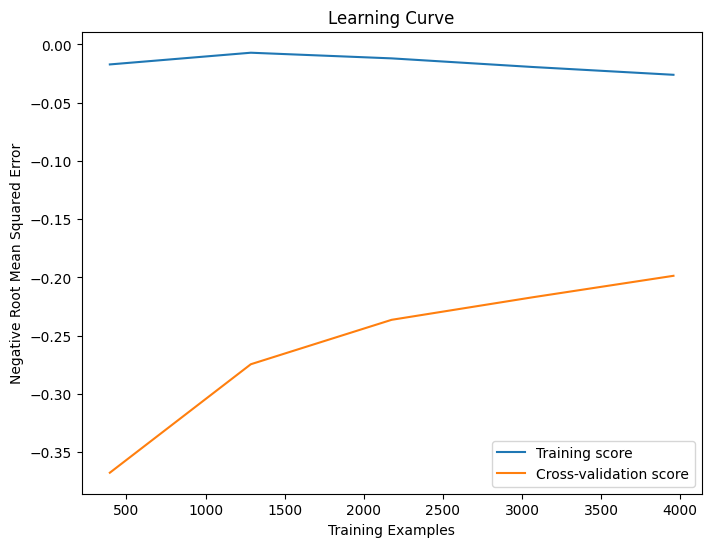

In [31]:
# Assuming 'estimator' is your trained model
train_sizes, train_scores, val_scores = learning_curve(best_lgbm, 
                                                       X_train, y_train, 
                                                       cv=10, 
                                                       scoring='neg_mean_squared_error')

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Negative Root Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()
# esto es lo que me dijo chatgpt que queda bastante feo sinceramente

In [29]:
val_scores

array([[-0.40991495, -0.35976652, -0.31954556, -0.38275293, -0.32724268,
        -0.39828837, -0.40015575, -0.39498722, -0.35861208, -0.32440605],
       [-0.28209587, -0.25770974, -0.26166562, -0.27663304, -0.26107766,
        -0.30380359, -0.29506523, -0.28810816, -0.28877272, -0.22979838],
       [-0.24010701, -0.21528466, -0.24359747, -0.25268696, -0.21971229,
        -0.25792999, -0.24543799, -0.22630698, -0.26326374, -0.19912047],
       [-0.23338251, -0.19734551, -0.2100659 , -0.22407257, -0.21543047,
        -0.23624206, -0.2297464 , -0.20666172, -0.23453295, -0.18287636],
       [-0.21336648, -0.18885537, -0.19746944, -0.20022403, -0.21070935,
        -0.21347603, -0.20654329, -0.18562656, -0.20961935, -0.15996253]])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 8
[LightGBM] [Info] Start training from score 0.274718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

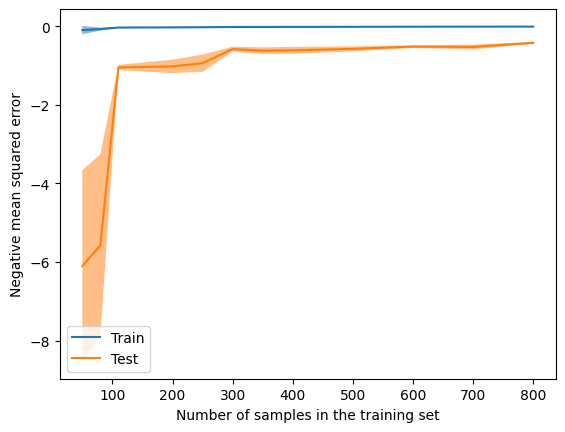

In [35]:
LearningCurveDisplay.from_estimator(
   best_lgbm, X, y, 
   train_sizes=[50, 80, 110, 200, 250, 300, 350, 400, 500, 600, 700, 800], 
   cv=5,
   scoring='neg_mean_squared_error')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =1234)

In [22]:
eval_set = [(X_train, y_train), (X_test, y_test)]
best_lgbm.fit(X_train, 
          y_train, 
          eval_metric="r2", 
          eval_set=eval_set)
results = best_lgbm.evals_result()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1827
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 9
[LightGBM] [Info] Start training from score 0.008101


AttributeError: 'LGBMRegressor' object has no attribute 'evals_result'

bah, no funciona como el xgboost, no se que más representaciones poner a lo mejor de todo esto

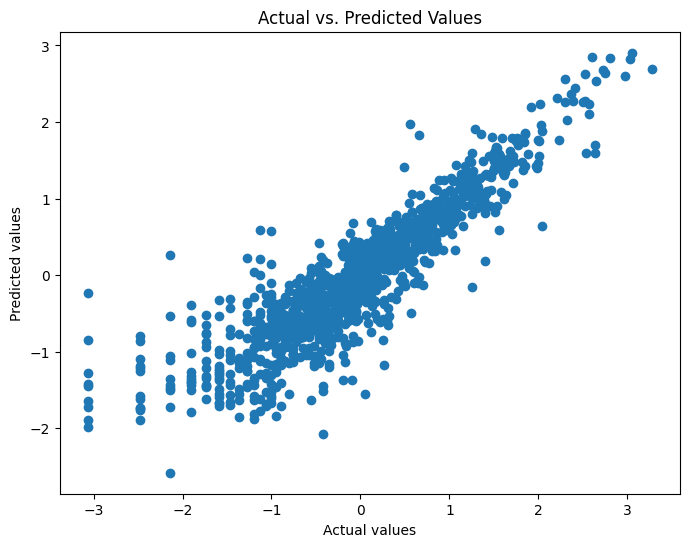

In [24]:
predicted_values = best_lgbm.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [30]:
pow_scaler.lambdas_
def inverse_bc(scaler, feature, position):
    if scaler.lambdas_[position] == 0:
        return np.exp(feature)
    else:
        return (feature * scaler.lambdas_[position] + 1) ** (1 / scaler.lambdas__[position])

array([-0.06142486, -0.09554574, -0.11469127,  0.18132064,  0.15803123,
        0.07975897])

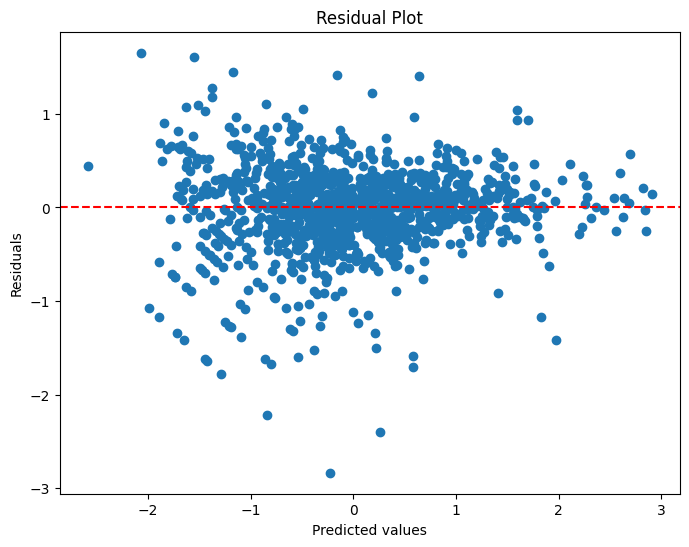

In [25]:
residuals = y_test - predicted_values

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()

## Prueba de shap

Nota: para los valores del shap tengo que volver a sacar el puto modelo pero desde la api de lgbm.

In [35]:
best_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.5,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'num_leaves': 50,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.1,
 'reg_lambda': 1.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [69]:
X_test

Ncasos_lagroll_15  Ncasos_lagroll_30   nHab   caudal  lluvia  \
1610              -0.28              -0.38   5782  3503.00    5.80   
5190               0.37               0.31  68152 14282.00    0.00   
3423              -0.82              -0.91  36299 13875.00    0.00   
2356              -1.07              -1.25  15017 44073.00    0.00   
1759              -0.07               0.09  17460  9213.00    0.00   
...                 ...                ...    ...      ...     ...   
1749              -0.11              -0.21  17460  6243.00    0.00   
5189               0.46               0.29  68152 13989.00    0.00   
5293              -0.19              -0.40  21067 20683.00    1.00   
1936               0.39               0.86  33082 45339.00    0.00   
2468              -0.72              -1.07  38891 14000.00   10.00   

      sars_loess  sars_loess_15  sars_loess_30  Month  
1610       -1.31          -1.47          -1.62   1.00  
5190       -0.31          -0.30          -0.33   4.00  
3423       -0.22          -0.25          -0.32   5.00  
2356       -0.33          -0.31          -0.41   2.00  
1759       -0.11          -0.15          -0.16   6.00  
...          ...            ...            ...    ...  
1749       -0.69          -0.70          -0.69   4.00  
5189       -0.43          -0.42          -0.46   4.00  
5293        0.24           0.24           0.19   5.00  
1936        0.91           0.94           0.98   1.00  
2468       -0.01           0.03           0.22  10.00  

[1100 rows x 9 columns]

In [68]:
explainer = shap.TreeExplainer(best_lgbm, X_test)
shap_values = explainer(X_test)

In [82]:
shap_values

.values =
array([[-0.07251545,  0.03792893, -0.20439381, ..., -0.31366354,
        -0.15513703, -0.03177075],
       [ 0.36924241, -0.07051248,  0.31850778, ..., -0.14212435,
         0.07699762, -0.1077035 ],
       [-0.42021579,  0.08687732,  0.21287381, ..., -0.13284514,
         0.07623209,  0.1370753 ],
       ...,
       [ 0.00624539, -0.02688271, -0.13232518, ...,  0.00216565,
        -0.00648744,  0.14800125],
       [ 0.285074  , -0.10923726, -0.11111469, ...,  0.1863478 ,
         0.02997023, -0.00199196],
       [-0.42300191,  0.10243488,  0.02689694, ..., -0.01252291,
         0.05565742,  0.13799023]])

.base_values =
array([-0.11846512, -0.11846512, -0.11846512, ..., -0.11846512,
       -0.11846512, -0.11846512])

.data =
array([[-2.76446876e-01, -3.78297996e-01,  5.78200000e+03, ...,
        -1.47065603e+00, -1.61514652e+00,  1.00000000e+00],
       [ 3.65796820e-01,  3.09172806e-01,  6.81520000e+04, ...,
        -3.00170758e-01, -3.27717298e-01,  4.00000000e+00],
      

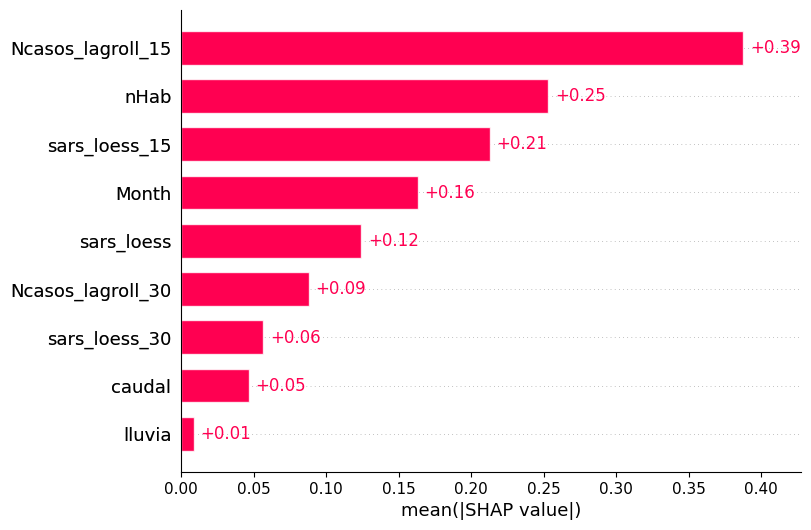

In [76]:
#shap.summary_plot(shap_values, X_test, plot_type = 'bar')
shap.plots.bar(shap_values)

In [20]:
shap.summary_plot(shap_values, X_test)

IndexError: list index out of range

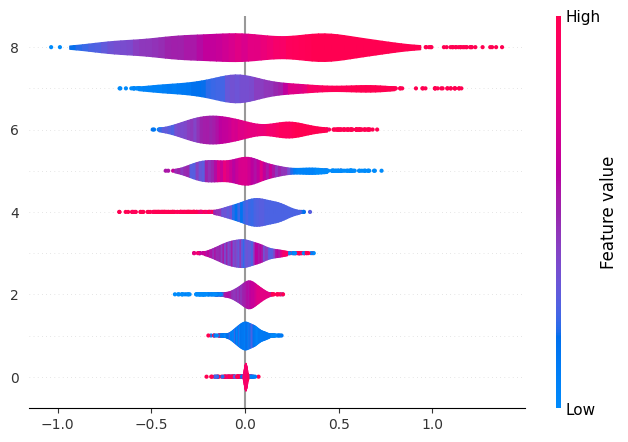

In [98]:
ft_names = ['Cases (2-weeks prior)', 'Habitats', 'SARS (loess 15)', 'Month',
            'SARS (smooth)', 'Cases (4-weeks prior)', 'Caudal en inglés', 'Precipitations']
shap.plots.violin(shap_values, feature_names = ft_names)

In [64]:
shap.initjs()
shap.force_plot(shap_values)

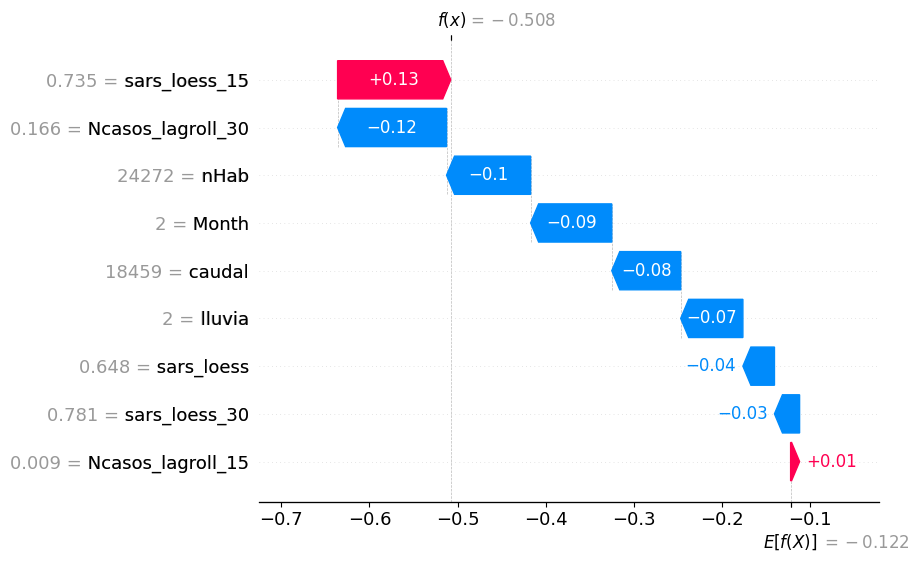

In [22]:
shap.waterfall_plot(shap_values[37])

shap._explanation.Explanation

In [94]:
shap.plots.scatter(shap_values[:, "Month"], color = shap_values[:,"Ncasos_lagroll_30"], x_jitter = .5)

Text(32.0, 0.5, 'SARS-CoV-2 Concentration')

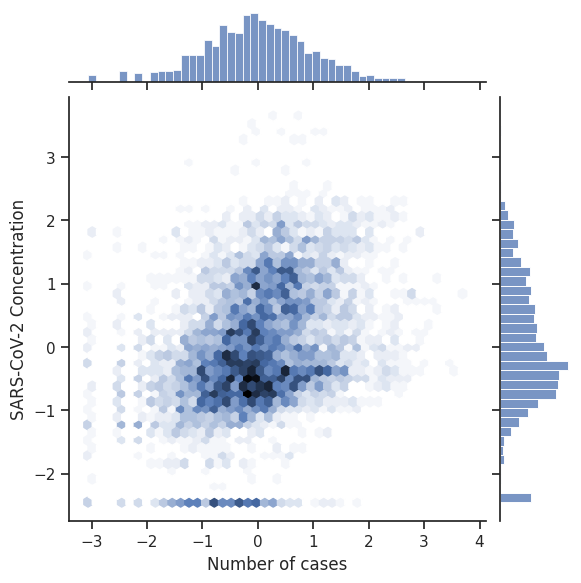

In [98]:
sns.set_style("ticks")
dens_plot = sns.jointplot(data_model_pwtr, 
              x = "Ncasos_lead",
              y = "sars_loess",
              kind = "hex"
              
)
dens_plot.ax_joint.set_xlabel("Number of cases")
dens_plot.ax_joint.set_ylabel("SARS-CoV-2 Concentration")

#dens_plot.ax_joint.scatter("Ncasos_lead", "sars_loess", data = data_model_pwtr)

Text(0.5, 32.249999999999986, 'Number of cases')

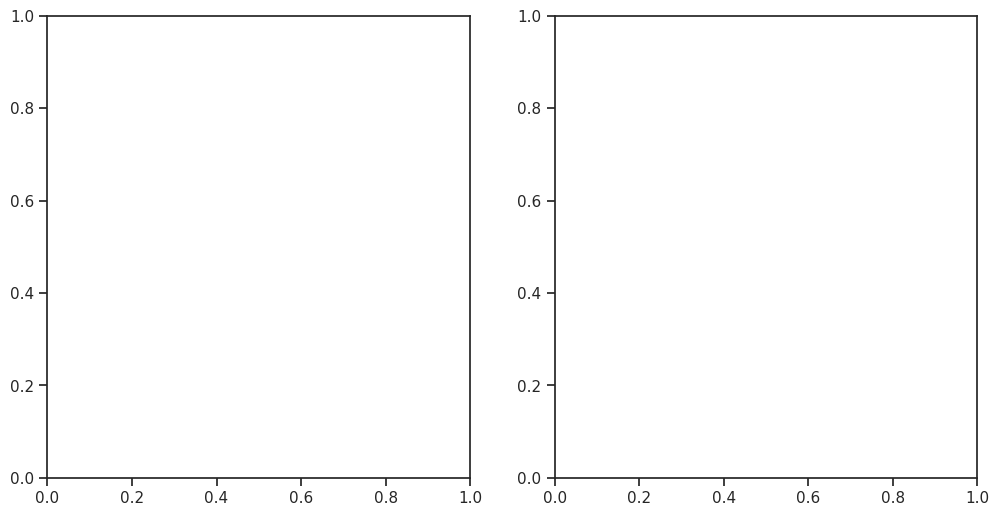

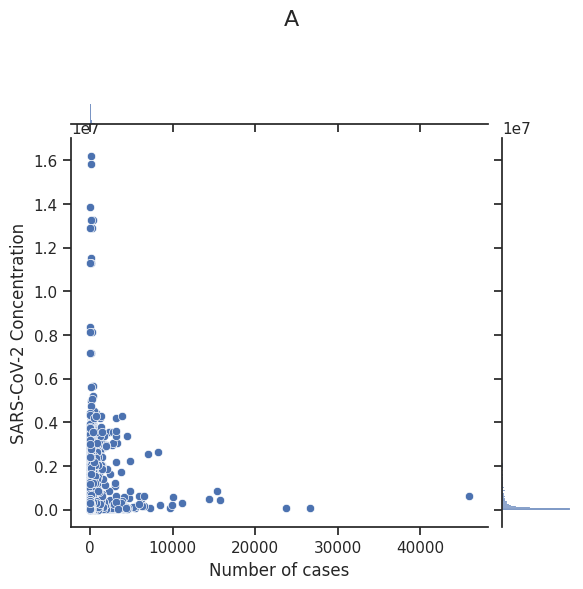

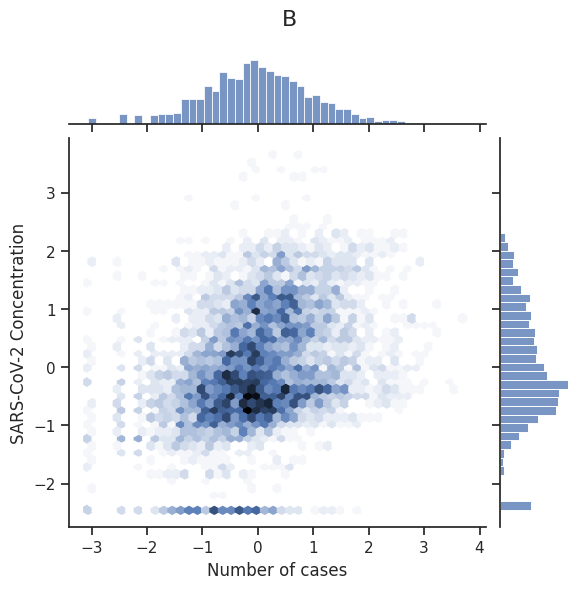

In [102]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))
dens_plot_notrans = sns.jointplot(data_model, 
              x = "Ncasos_lead",
              y = "sars_loess"
)
dens_plot_trans = sns.jointplot(data_model_pwtr, 
              x = "Ncasos_lead",
              y = "sars_loess",
              kind = "hex"
)
dens_plot_notrans.fig.suptitle('A', fontsize = 16)
dens_plot_notrans.fig.subplots_adjust(top=.9)
dens_plot_notrans.ax_joint.set_ylabel("SARS-CoV-2 Concentration")
dens_plot_notrans.ax_joint.set_xlabel("Number of cases")

dens_plot_trans.fig.suptitle('B', fontsize = 16)
dens_plot_trans.fig.subplots_adjust(top=.9)
dens_plot_trans.ax_joint.set_ylabel("SARS-CoV-2 Concentration")
dens_plot_trans.ax_joint.set_xlabel("Number of cases")

